# ¿Cuál es la mejor tarifa?

## Descripción general
La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vasmos a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendremos los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Nuestro trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

Introduccion.
El objetivo de este proyecto es analizar el comportamiento de los clientes de Megaline que usan las tarifas de prepago Surf y Ultimate para determinar cuál de las dos genera mayores ingresos. Esto permitirá al departamento comercial ajustar su presupuesto de publicidad de manera más efectiva.

La metodología que seguiremos para abordar este proyecto involucra los siguientes pasos:

1.Inicialización y carga de datos:
 Cargar las librerías necesarias y los archivos de datos proporcionados en DataFrames separados.

2.Preparación de datos:
 Explorar cada DataFrame para identificar y corregir posibles problemas como tipos de datos incorrectos, valores ausentes o duplicados. Se enriquecerán los datos si es necesario para facilitar el análisis posterior.

3.Análisis de datos por usuario y periodo:
 Agrupar los datos por usuario y mes para calcular el consumo de minutos de llamadas, mensajes y volumen de internet.

4.Cálculo de ingresos mensuales:
 Calcular el ingreso mensual generado por cada usuario, teniendo en cuenta las condiciones de cada tarifa.

5.Estudio del comportamiento del usuario:
Analizar estadísticamente el comportamiento de los usuarios de cada tarifa en cuanto a llamadas, mensajes e internet, utilizando estadísticas descriptivas y visualizaciones.

6.Prueba de hipótesis estadísticas:
Realizar pruebas estadísticas para comparar los ingresos promedio entre las tarifas Surf y Ultimate, y entre los usuarios de la región NY-NJ y otras regiones.

7.Conclusión general:
 Vamos a resumir los hallazgos clave y las decisiones importantes que tomamos durante el análisis.

## Inicialización

In [ ]:
# Cargar todas las librerías

#Importamos desde el inicio todas las librerias que vamos a necesitar en el analisis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import math



## Cargar datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Carga los archivos de datos en diferentes DataFrames

#Cargamos los archivos CSV en su respectivo DataFrame
users_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Archivos CSV /Proyecto 5/megaline_users.csv')
calls_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Archivos CSV /Proyecto 5/megaline_calls.csv')
messages_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Archivos CSV /Proyecto 5/megaline_messages.csv')
internet_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Archivos CSV /Proyecto 5/megaline_internet.csv')
plans_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Archivos CSV /Proyecto 5/megaline_plans.csv')



## Preparar los datos

Los datos para este proyecto se dividen en varias tablas. Exploraremos cada una para tener una comprensión inicial de los datos. Si es necesario, haremos las correcciones requeridas en cada tabla.

## Tarifas

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

print("Informacion general del DataFrame Plans:")
display(plans_df.info())


Informacion general del DataFrame Plans:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


None

In [ ]:
# Imprime una muestra de los datos para las tarifas

#Vamos a ver las 2 filas que contiene el Dataframe
print("Primeras 10 filas del DataFrame Plans:")
display(plans_df.head())


Primeras 10 filas del DataFrame Plans:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


No se observan problemas obvios como tipos de datos incorrectos o valores ausentes en este DataFrame. Los datos parecen estar limpios y listos para usar en este punto.
No parece haber necesidad de correcciones o enriquecimiento de datos para el DataFrame plans_df en función de esta exploración inicial. Se nos dan indicaciones sobre como la empresa redondea ciertos valores para los cobros; pero se utilizaran en otras tablas.

## Usuarios/as

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

print("Informacion general del Dataframe Users:")
display(users_df.info())


Informacion general del Dataframe Users:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

In [ ]:
# Imprime una muestra de datos para usuarios

print("Primeras 10 filas del DataFrama Users:")
display(users_df.head(10))


Primeras 10 filas del DataFrama Users:


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


Userid y age estan bien en tipo de datos int porque son identificadores. Pero si tenemos unos que podemos cambiar; las fechas de registro y de abandono, podemos convertirlas a datetime porque mas adelante sera util.

Vemos que hay valores ausentes (NaN) en churn_date pero nos indica la documentacion que quiere decir que el usuario aun esta usando el servicio por lo que no vamos a corregir o eliminarlos.

### Corregir los datos

Corrigemos los problemas obvios con los datos basándonos en las observaciones iniciales.

Por un lado vamos a corregir las columnas que involucran fechas al formato datetime.**bold text**

In [ ]:
#Aqui convertimos las 2 columnas a tipo datetime
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format='%d-%m-%y' )
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'])

#Luego verificamos la conversion.
print('Tipos de datos del dataframe despues de la conversion:')
display(users_df.info())



Tipos de datos del dataframe despues de la conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
 8   reg_mont    500 non-null    int32         
dtypes: datetime64[ns](2), int32(1), int64(2), object(4)
memory usage: 33.3+ KB


None

### Enriquecer los datos

Agregaremos factores adicionales a los datos que pudieran ser útiles en caso de ser necesario.

Podriamos agregar una columna especifica para indicar el mes; podria ser utila a futuro para ver tendencias o patrones de consumo por mes de los clientes.




In [ ]:
#Vamos a extraer el mes de la fecha de registro y agregarlo en una nueva columna.
users_df['reg_mont'] = users_df['reg_date'].dt.month

#Mostramos las primeras 5 filas para ver si se incluyo satisfactoriamente.
display(users_df.head())


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_mont
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,5


## Llamadas

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print('Informacion general del Dataframe llamadas:')
display(calls_df.info())


Informacion general del Dataframe llamadas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None

In [ ]:
# Imprime una muestra de datos para las llamadas
print('Las primeras 10 filas de llamadas:')
display(calls_df.head(10))


Las primeras 10 filas de llamadas:


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


Vemos que igual que en el DataFrame de users podemos hacer unos cambios por ejemolo en call_date pasarlo a datetime. En el caso de la duracion tambien podemos hacer un cambio y redondear el tiempo al siguiente entero como se nos indico en la documentacion. Lo haremos creando una nueva columna para conservar los datos originales siempre.

### Corregir los datos

Corrigemos los problemas obvios con los datos basándonos en las observaciones iniciales.

In [ ]:
#Cambiar call_date a datetime
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])

#Redondeamos el tiempo de llamada y guardamos en una nueva columna llamada duration_rounded
#Por la condicion de la empresa de redondear al entero siguiente vamos a usar la funcion numpy.ceil() que hace presisamente eso
#.astype(int) para cambiar el valor a int porque la funcionb nos devuelve un flotante
calls_df['duration_rounded'] = np.ceil(calls_df['duration']).astype(int)

#Ahora vamos a revisar el cambio a tipo fecha y el redondeo en su nueva columna

print('El cambio de datos seria:')
display(calls_df.info())
print('\n El tiempo de duracion redondeado seria:')
display(calls_df.head())


El cambio de datos seria:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                137735 non-null  object        
 1   user_id           137735 non-null  int64         
 2   call_date         137735 non-null  datetime64[ns]
 3   duration          137735 non-null  float64       
 4   duration_rounded  137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.3+ MB


None


 El tiempo de duracion redondeado seria:


,id,user_id,call_date,duration,duration_rounded
0,1000_93,1000,2018-12-27,8.52,9
1,1000_145,1000,2018-12-27,13.66,14
2,1000_247,1000,2018-12-27,14.48,15
3,1000_309,1000,2018-12-28,5.76,6
4,1000_380,1000,2018-12-30,4.22,5


### Enriquecer los datos

Para enriquecer tambien podemos sacar el mes de las llamadas y agregar una nueva columna; podria ser util para futuros analisis.



In [ ]:
#Vamos a estraer el mes usando .dt.month como hicimos en el Dataframe de users y almacenarlo en una nueva columna.
calls_df['call_month'] = calls_df['call_date'].dt.month

#Mostramos las primeras 5 filas para ver el agregado
display(calls_df.head())

,id,user_id,call_date,duration,duration_rounded,call_month
0,1000_93,1000,2018-12-27,8.52,9,12
1,1000_145,1000,2018-12-27,13.66,14,12
2,1000_247,1000,2018-12-27,14.48,15,12
3,1000_309,1000,2018-12-28,5.76,6,12
4,1000_380,1000,2018-12-30,4.22,5,12


## Mensajes

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print('Informacion general del Dataframe mensajes:')
display(messages_df.info())


Informacion general del Dataframe mensajes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None

In [ ]:
# Imprime una muestra de datos para los mensajes
print('Las primeras 10 filas de mensajes:')
display(messages_df.head(10))


Las primeras 10 filas de mensajes:


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


Nuevamente la informacion se ve bastante limpia y el unico cambio que podriamos hacer es otra vez pasar la fecha a datetime.

### Corregir los datos

In [ ]:
#Vamos a corregir el tipo de datos a la fecha, pasarlo a datetime
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])

#Revisamos el cambio
display(messages_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


None

### Enriquecer los datos

Tambien podemos extraer el mes y guardarlo en una columna propia para futuros analisis.

In [ ]:
#Vamos a extraer el mes y guardarlo en una nueva columna usando .dt.month nuevamente
messages_df['message_month'] = messages_df['message_date'].dt.month

#Luego revisamos el agregaro viendo 5 filas
display(messages_df.head())

,id,user_id,message_date,message_month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


## Internet

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de internet
print('La informacion general del Dataframe de Internet es:')
display(internet_df.info())


La informacion general del Dataframe de Internet es:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None

In [ ]:
# Imprime una muestra de datos para el tráfico de internet
print('Las primeras 10 filas de internet:')
display(internet_df.head(10))


Las primeras 10 filas de internet:


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


La informacion esta bastante limpia en el aspecto de ausentes, pero tenemos que hacer otro cambio en la columna que contiene fechas y mas adelante vamos a abordar el asunto de los Megabytes pues la informacion indica que se manejan diferente a las llamadas


### Corregir los datos

In [ ]:
#Vamos a hacer el cambio de la fecha a datetime
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])

#Luego revisamos el cambio en la informacion
display(internet_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


None

### Enriquecer los datos

Una vez mas podemos extraer el mes y guardarlo en una nueva columna, asi tenemos ese detalle para los Dataframes que tengan fechas.

In [ ]:
#Vamos a extraer el mes de la fecha y guardarlo en una nueva columna.
internet_df['session_month'] = internet_df['session_date'].dt.month

#Luego revisamos el cambio
display(internet_df.head())


,id,user_id,session_date,mb_used,session_month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


## Estudiar las condiciones de las tarifas

In [ ]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print('Las condiciones de las tarifas son:')
display(plans_df)


Las condiciones de las tarifas son:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

Ahora que los datos están limpios, agregamos los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.

In [ ]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

# Usaremos el metodo .agg() que es mas versatil para agregar las columnas nuevas con su respectiva operacion.
monthly_calls = calls_df.groupby(['user_id', 'call_month']).agg(call_count =('id', 'count')).reset_index()

#Vemos el resultado
display(monthly_calls.head())


,user_id,call_month,call_count
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


In [ ]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
monthly_call_minutes = calls_df.groupby(['user_id', 'call_month']).agg(total_minutes = ('duration_rounded', 'sum')).reset_index()

#Mostramos el resultado
display(monthly_call_minutes.head())


,user_id,call_month,total_minutes
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426


In [ ]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
monthly_messages = messages_df.groupby(['user_id', 'message_month']).agg(message_count = ('id', 'count')).reset_index()

#Mostramos el resultado del conteo
display(monthly_messages.head())

,user_id,message_month,message_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [ ]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
monthly_internet = internet_df.groupby(['user_id', 'session_month']).agg(monthly_mb = ('mb_used', 'sum')).reset_index()

#Vemos el resultado
display(monthly_internet.head())


,user_id,session_month,monthly_mb
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


Juntamos los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.

In [ ]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

#Para que Pandas pueda identificar y unir renombramos las columnas que involucran el mes para que encuentre coincidencia.
monthly_calls = monthly_calls.rename(columns={'call_month': 'month'})
monthly_call_minutes = monthly_call_minutes.rename(columns={'call_month': 'month'})
monthly_messages = monthly_messages.rename(columns={'message_month': 'month'})
monthly_internet = monthly_internet.rename(columns={'session_month': 'month'})

#Ahora comenzamos a unir en un nuevo DataFrame.
data_merged = monthly_calls.merge(monthly_call_minutes, on=['user_id', 'month'], how='outer')
data_merged = data_merged.merge(monthly_messages, on=['user_id', 'month'], how='outer')
data_merged = data_merged.merge(monthly_internet, on=['user_id', 'month'], how='outer')

#Vamos a mostrar el resultado para comprobar.
print('El resultado de la fusion es:')
display(data_merged.head())



El resultado de la fusion es:


,user_id,month,call_count,total_minutes,message_count,monthly_mb
0,1000,12,16.0,124.0,11.0,1901.47
1,1001,8,27.0,182.0,30.0,6919.15
2,1001,9,49.0,315.0,44.0,13314.82
3,1001,10,65.0,393.0,53.0,22330.49
4,1001,11,64.0,426.0,36.0,18504.30


In [ ]:
# Añade la información de la tarifa e incliumos la ciudad por si acaso fuese necesario para analisis
data_merged = data_merged.merge(users_df[['user_id', 'plan', 'city']], on='user_id', how='left')

#Mostramos el resultado
display(data_merged.head())

print('La informacion del Dataframe resultante es: ')
display(data_merged.info())


,user_id,month,call_count,total_minutes,message_count,monthly_mb,plan,city
0,1000,12,16.0,124.0,11.0,1901.47,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,27.0,182.0,30.0,6919.15,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,49.0,315.0,44.0,13314.82,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,65.0,393.0,53.0,22330.49,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,64.0,426.0,36.0,18504.30,surf,"Seattle-Tacoma-Bellevue, WA MSA"


La informacion del Dataframe resultante es: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2293 non-null   int64  
 1   month          2293 non-null   int32  
 2   call_count     2258 non-null   float64
 3   total_minutes  2258 non-null   float64
 4   message_count  1806 non-null   float64
 5   monthly_mb     2277 non-null   float64
 6   plan           2293 non-null   object 
 7   city           2293 non-null   object 
dtypes: float64(4), int32(1), int64(1), object(2)
memory usage: 134.5+ KB


None

Calcularemos los ingresos mensuales por usuario restando el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; luego agregaremos la tarifa mensual en función del plan de llamadas.

In [ ]:
# Calcula el ingreso mensual para cada usuario

#info() nos muestra que tenemos unos valores ausentes en ciertas columnas, lo que indica que el cliente no utilizo ese servicio
#Vamos a cambiar esos NaN por 0 para que se puedan tomar correctamente a la hora de hacer los calculos.
usage_columns = ['call_count', 'total_minutes', 'message_count', 'monthly_mb']

for col in data_merged.columns: # Iterar sobre todas las columnas y verificar si están en usage_columns antes de llenar NaN
    if col in usage_columns:
        data_merged[col] = data_merged[col].fillna(0)

#Ahora calculamos el ingreso mensual para cada cliente
#Primero tenemos que agregar la informacion de los planes, costos y limites.
#Left on y right on porque tienen nombres diferentes en los dataframes originales.
# Eliminamos suffixes para simplificar ya que manejamos el renombre y la eliminacion manualmente
data_merged = data_merged.merge(plans_df, left_on = 'plan', right_on = 'plan_name', how = 'left')

# Luego de revisar los resultados vimos que estaba la columna 'plan_name', vamos a eliminarla ya que 'plan' ya existe
if 'plan_name' in data_merged.columns:
    data_merged = data_merged.drop('plan_name', axis=1)


#Para calcular los ingresos mensuales creamos una funcion.
#El parametro a ingresarle a la funcion serian las filas del DataFrame, por eso ponemor row

def calculate_monthly_income(row):
    # Corregimos los nombres de las columnas para que coincidan con los del DataFrame fusionado
    # Los nombres de las columnas de plans_df se añaden directamente sin sufijos después de la fusión
    plan = row['plan'] # La columna que identifica el plan se llama 'plan'
    minutes_included = row['minutes_included']
    messages_included = row['messages_included']
    mb_per_month_included = row['mb_per_month_included']
    usd_monthly_fee = row['usd_monthly_pay'] # El nombre de la columna en plans_df es 'usd_monthly_pay'
    usd_per_minute = row['usd_per_minute']
    usd_per_message = row['usd_per_message']
    # Corregimos el nombre de la columna de costo de internet
    usd_per_gb = row['usd_per_gb'] # El nombre de la columna en plans_df es 'usd_per_gb'

    #Ahora vamos a ingresar/extraer los totales consumidos
    total_minutes = row['total_minutes']
    message_count = row['message_count']
    monthly_mb = row['monthly_mb']

    #Ahora tenemos que calcular el costo de lo que se consumo primero sacaremos los adicionales si hay en cada caso.
    #Si el uso fuese menor que el limite podria dar un negativo, por eso usaremos max(0)
    extra_minutes = max(0, total_minutes - minutes_included)
    extra_messages = max(0, message_count - messages_included)
    extra_mb = max(0, monthly_mb - mb_per_month_included)
    extra_gb = np.ceil(extra_mb / 1024) #Para calcular el costo de los GB tenemos que convertir los MB a GB siempre redondeando hacia el siguiente entero

    #Ya podemos calcularel costo de los minutos y mensajes adicionales.
    extra_minute_cost = extra_minutes * usd_per_minute
    extra_message_cost = extra_messages * usd_per_message
    # Usamos usd_per_gb para calcular el costo adicional de internet
    extra_gb_cost = extra_gb * usd_per_gb

    #Ahora Sacamos el ingreso total mensual en base a la tarifa del plan mas los adicionales
    monthly_income = usd_monthly_fee + extra_minute_cost + extra_message_cost + extra_gb_cost

    #Retornamos el resultado
    return monthly_income


#Ahora ejecutamos/aplicamos la funcion a cada una de las filas delDataframe que obtuvimos uniendo las tablas
#Y obtenemos el ingreso mensual
data_merged['monthly_income'] = data_merged.apply(calculate_monthly_income, axis=1)

#Vamos a mostrar la informacion general de la tabla para verificar la nueva columna
print('La informacion general del Dataframe es:')
display(data_merged.info())

#Vamos a revisar las primeras 10 filas
print('\n Las primeras 10 filas del Dataframe: ')
display(data_merged.head(10))



La informacion general del Dataframe es:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   int64  
 1   month                  2293 non-null   int32  
 2   call_count             2293 non-null   float64
 3   total_minutes          2293 non-null   float64
 4   message_count          2293 non-null   float64
 5   monthly_mb             2293 non-null   float64
 6   plan                   2293 non-null   object 
 7   city                   2293 non-null   object 
 8   messages_included      2293 non-null   int64  
 9   mb_per_month_included  2293 non-null   int64  
 10  minutes_included       2293 non-null   int64  
 11  usd_monthly_pay        2293 non-null   int64  
 12  usd_per_gb             2293 non-null   int64  
 13  usd_per_message        2293 non-null   float64
 14  usd_per_minute 

None


 Las primeras 10 filas del Dataframe: 


,user_id,month,call_count,total_minutes,message_count,monthly_mb,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,monthly_income
0,1000,12,16.0,124.0,11.0,1901.47,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,70.00
1,1001,8,27.0,182.0,30.0,6919.15,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,20.00
2,1001,9,49.0,315.0,44.0,13314.82,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,20.00
3,1001,10,65.0,393.0,53.0,22330.49,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,90.09
4,1001,11,64.0,426.0,36.0,18504.30,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,60.00
5,1001,12,56.0,412.0,44.0,19369.18,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,60.00
6,1002,10,11.0,59.0,15.0,6552.01,surf,"Las Vegas-Henderson-Paradise, NV MSA",50,15360,500,20,10,0.03,0.03,20.00
7,1002,11,55.0,386.0,32.0,19345.08,surf,"Las Vegas-Henderson-Paradise, NV MSA",50,15360,500,20,10,0.03,0.03,60.00
8,1002,12,47.0,384.0,41.0,14396.24,surf,"Las Vegas-Henderson-Paradise, NV MSA",50,15360,500,20,10,0.03,0.03,20.00
9,1003,12,149.0,1104.0,50.0,27044.14,surf,"Tulsa, OK MSA",50,15360,500,20,10,0.03,0.03,158.12


## Estudia el comportamiento de usuario

Calcularemos algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibujaremos gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.


### Llamadas

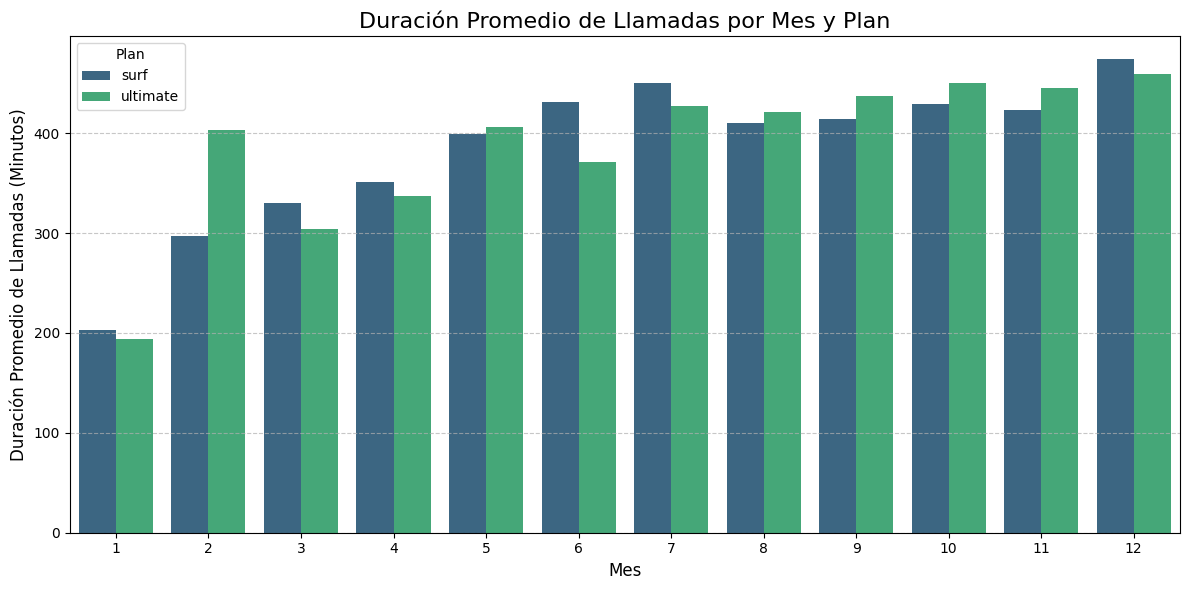

In [ ]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
#Vamos a trabajar con el ultimo Dataframe data_merged pues contiene los datos relevantes.data_merged

# Agrupamos el DataFrame data_merged por 'plan' y 'month', y calculamos la media de la columna 'total_minutes'.
average_monthly_minutes = data_merged.groupby(['plan', 'month'])['total_minutes'].mean().reset_index()

#Despues de haberlo verificado trazamos el grafico de barras para ver los resultados
plt.figure(figsize=(12, 6))
sns.barplot(data=average_monthly_minutes, x='month', y='total_minutes', hue='plan', palette='viridis')

# Añadimos títulos y etiquetas profesionales
plt.title('Duración Promedio de Llamadas por Mes y Plan', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Duración Promedio de Llamadas (Minutos)', fontsize=12)
plt.xticks(rotation=0) # Aseguramos que las etiquetas del mes sean legibles
plt.legend(title='Plan')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añadimos una cuadrícula suave en el eje Y

# Ajustamos el diseño para evitar que las etiquetas se superpongan
plt.tight_layout()

# Mostramos el gráfico
plt.show()






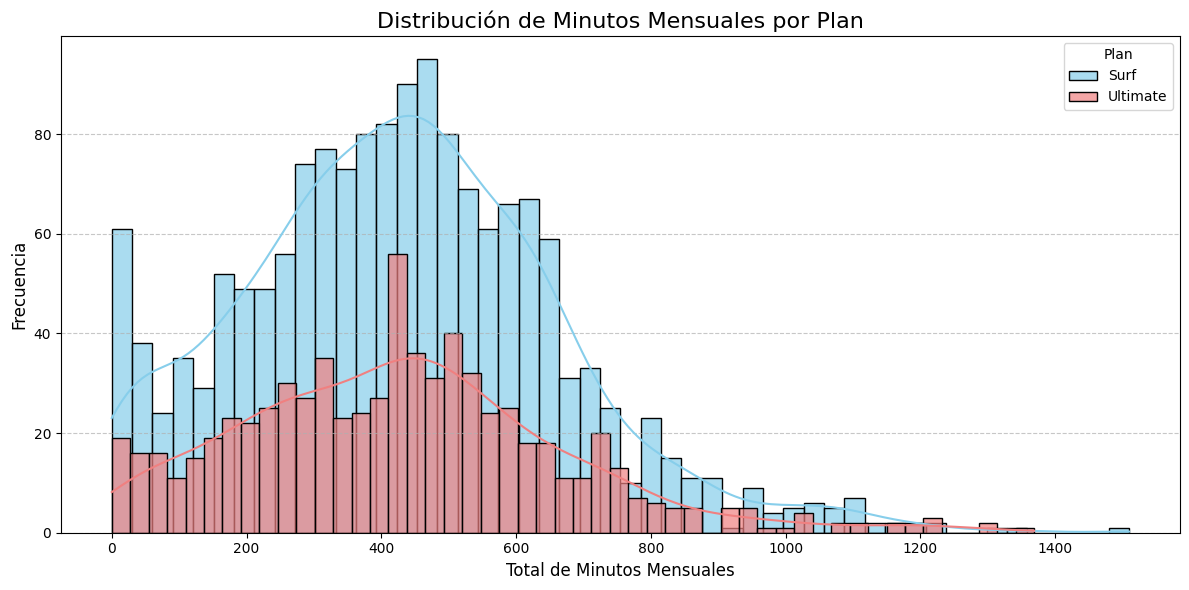

In [ ]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
#Como no hay algun parametro limitante o condicional; esta vez usare Seaborn para los graficos

#Primero separamos los minutos para cada plan
surf_minutes = data_merged[data_merged['plan'] == 'surf']['total_minutes']
ultimate_minutes = data_merged[data_merged['plan']== 'ultimate']['total_minutes']

#Hoy trazamos un histograma para visualizar la distribución de minutos mensuales por plan.
plt.figure(figsize=(12, 6))

#Hacemos histogramas para cada plan elegimos colores y detalles al gusto
sns.histplot(surf_minutes, bins=50, color='skyblue', alpha=0.7, label='Surf', kde=True)
sns.histplot(ultimate_minutes, bins=50, color='lightcoral', alpha=0.7, label='Ultimate', kde=True)

#Ahora ponemos los títulos y etiquetas
plt.title('Distribución de Minutos Mensuales por Plan', fontsize=16)
plt.xlabel('Total de Minutos Mensuales', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='Plan')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añadimos una cuadrícula suave

#Ajustamos el diseño y mostramos el grafico
plt.tight_layout()
plt.show()


Calcularemos la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.

In [ ]:
# Calcula la media y la varianza de la duración mensual de llamadas.

mean_surf_minutes = surf_minutes.mean()
variance_surf_minutes = surf_minutes.var()
mean_ultimate_minutes = ultimate_minutes.mean()
variance_ultimate_minutes = ultimate_minutes.var()

#Mostramos los resultados e imprimimos los valores a 2 decimales.
print('Plan surf:')
print(f'Media de minutos mensuales: {mean_surf_minutes:.2f}')
print(f'Varianza de minutos mensuales: {variance_surf_minutes:.2f}')

print('\nPlan Ultimate:')
print(f'Media de minutos mensuales: {mean_ultimate_minutes:.2f}')
print(f'Varianza de minutos mensuales: {variance_ultimate_minutes:.2f}')


Plan surf:
Media de minutos mensuales: 428.75
Varianza de minutos mensuales: 54968.28

Plan Ultimate:
Media de minutos mensuales: 430.45
Varianza de minutos mensuales: 57844.46


/tmp/ipython-input-34-2188196858.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='plan', y='total_minutes', data=data_merged, palette='viridis')


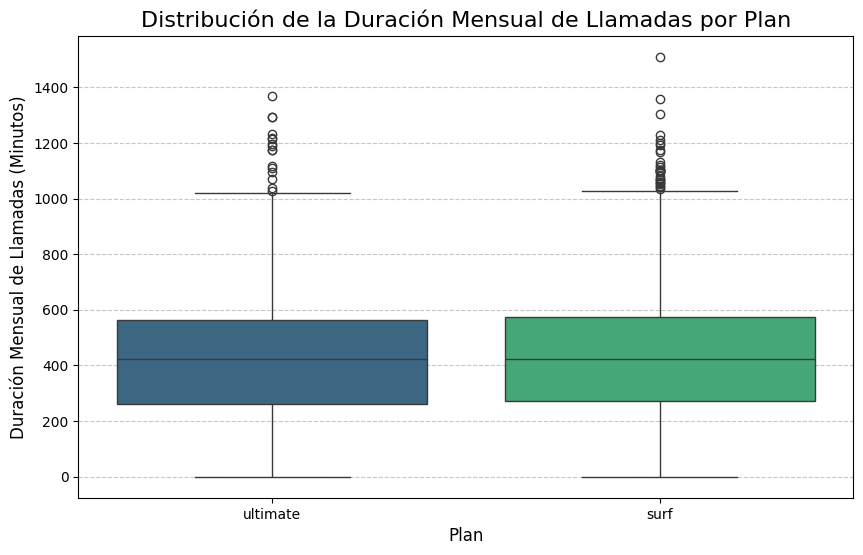

In [ ]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

plt.figure(figsize=(10, 6))

#Usamos seaborn.boxplot para crear el diagrama de caja
sns.boxplot(x='plan', y='total_minutes', data=data_merged, palette='viridis')

#Agregamos los títulos y etiquetas
plt.title('Distribución de la Duración Mensual de Llamadas por Plan', fontsize=16)
plt.xlabel('Plan', fontsize=12)
plt.ylabel('Duración Mensual de Llamadas (Minutos)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añadimos una cuadrícula suave

# Mostramos el gráfico
plt.show()


En base a este análisis, podemos concluir que el comportamiento de los usuarios con respecto a la duración mensual de las llamadas no varía significativamente en función del plan.

Las medias y varianza son bastante similares en ambos planes, y segun vemos en el grafico de barras y el histograma su comportamiento es bastante parecido. Hay ciertos valores atipicos en Surf pero son pocos; y ambos igual tienen un alza hacia fin de año pero aun asi ambas graficas se ven variaciones sutiles.
Posiblemente hay mayor cantidad de usuarios de alto consumo en surf segun el diagrama de caja.

Podemos decir que en el aspecto de "cuanto hablan los usuarios"; el plan de suscripcion no es un factor determinante principal. Asi que para los de marketing puede significar que las diferencias en el ingreso mensual entre planes no se deba principalmente a la cantidad de minutos consumidos. Hay que seguir analizando otros factores.


### Mensajes

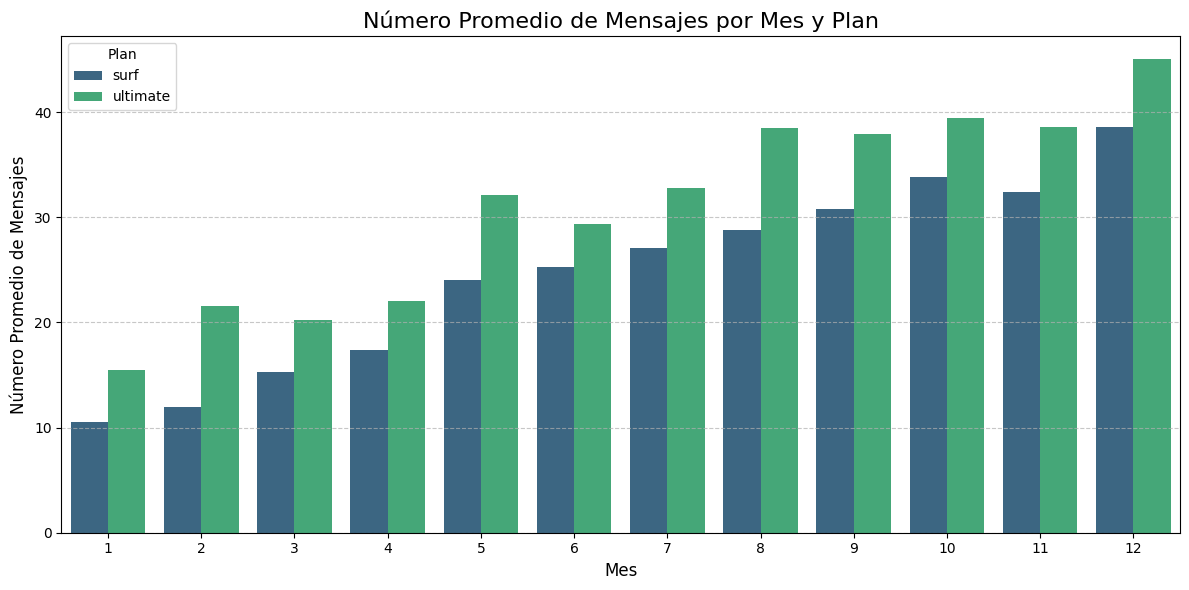


Plan surf:
Media de mensajes mensuales: 31.16
Varianza de mensajes mensuales: 1126.72

Plan Ultimate:
Media de mensajes mensuales: 37.55
Varianza de mensajes mensuales: 1208.76


In [ ]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

#Haremos el mismo analisis y proceso que hicimos con los minutos.
#Haremos un grafico de barras para ver la tendencia mes a mes y ver si hay algun patron estacional de consumo.
#EMpezamos calculando promedio de mensajes y agrupando por plan y mes el promedio.
average_monthly_messages = data_merged.groupby(['plan', 'month'])['message_count'].mean().reset_index()

#Ahora graficamos
plt.figure(figsize=(12, 6)) #Definimos tamano y ejes
sns.barplot(data=average_monthly_messages, x='month', y='message_count', hue='plan', palette='viridis')

#Agregamos títulos y etiquetas
plt.title('Número Promedio de Mensajes por Mes y Plan', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Número Promedio de Mensajes', fontsize=12)
plt.xticks(rotation=0) # Aseguramos que las etiquetas del mes sean legibles
plt.legend(title='Plan')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añadimos una cuadrícula en el eje Y

#Ajustamos el diseño para evitar que las etiquetas se superpongan y mostramos
plt.tight_layout()
plt.show()

print()

#========================================================================================================
#Ademas mostramos los 2 datos estadisticos relevantes
#Primero separamos los datos de la cantidad de mensajes por plan
surf_messages = data_merged[data_merged['plan'] == 'surf']['message_count']
ultimate_messages = data_merged[data_merged['plan'] == 'ultimate']['message_count']

#Luego calculamos la media y varianza para cada plan.
#Surf
mean_surf_messages = surf_messages.mean()
variance_surf_messages = surf_messages.var()
#Ultimate
mean_ultimate_messages = ultimate_messages.mean()
variance_ultimate_messages = ultimate_messages.var()

#Mostramos los resultados e imprimimos los valores a 2 decimales.
print('Plan surf:')
print(f'Media de mensajes mensuales: {mean_surf_messages:.2f}')
print(f'Varianza de mensajes mensuales: {variance_surf_messages:.2f}')

print('\nPlan Ultimate:')
print(f'Media de mensajes mensuales: {mean_ultimate_messages:.2f}')
print(f'Varianza de mensajes mensuales: {variance_ultimate_messages:.2f}')



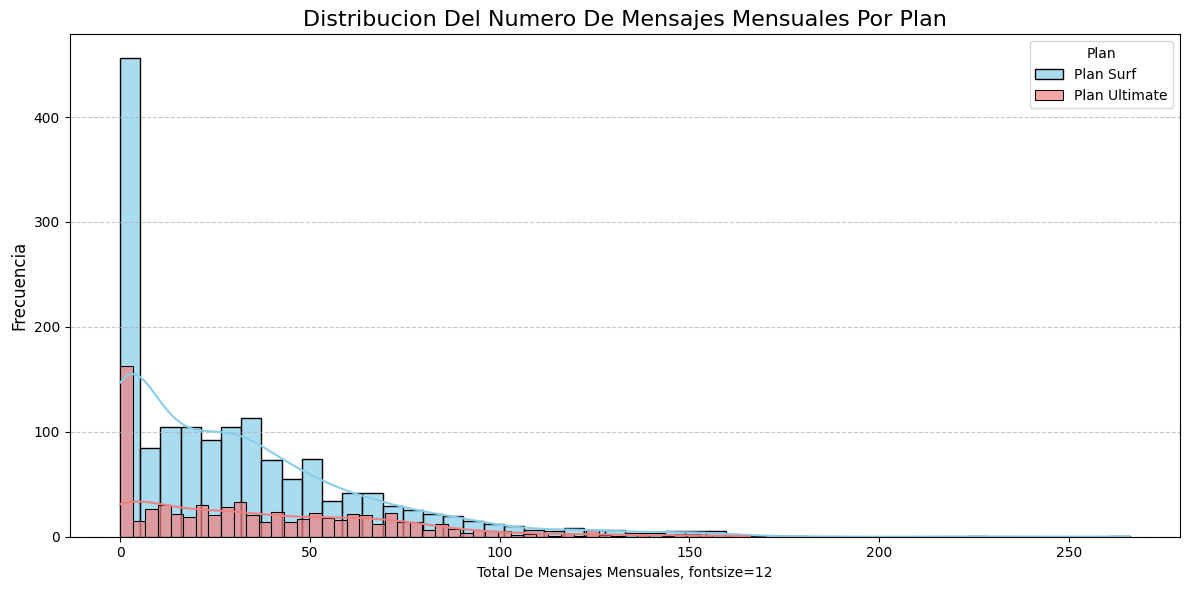

In [ ]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
#Aqui la instruccion indica internet pero supongo que se referia a mensajes.

#Graficare con un histograma la comparacion de consumo de MENSAJES
plt.figure(figsize = (12,6))

#Hare igual que en minutos, uno para cada plan y superponerlos
sns.histplot(surf_messages, bins=50, color='skyblue', alpha=0.7, label='Plan Surf', kde=True)
sns.histplot(ultimate_messages, bins=50, color='lightcoral', alpha=0.7, label='Plan Ultimate', kde=True)

#Agregamos titulos y etiquetas
plt.title('Distribucion Del Numero De Mensajes Mensuales Por Plan', fontsize=16)
plt.xlabel('Total De Mensajes Mensuales, fontsize=12')
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title= 'Plan')
plt.grid(axis = 'y', linestyle='--', alpha=0.7) #Agregamos una cuadricula

#Ajustamos el diseno y mostramos
plt.tight_layout()
plt.show()



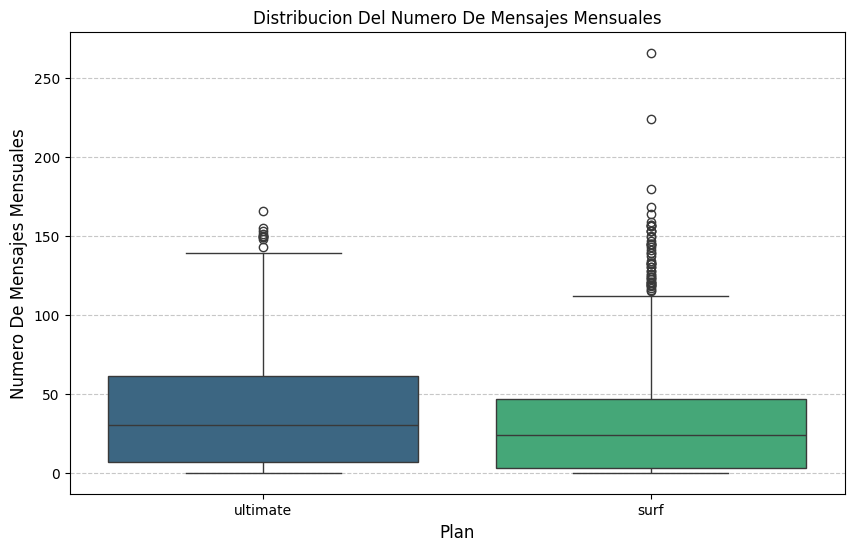

In [ ]:
#Hare tambien un diagrama de caja para tener una vista mas completa del comportamiento de los usuarios con los mensajes.

#Trazamos el diagrama para empezar
plt.figure(figsize=(10 , 6))

#Hacemos el grafico de caja
sns.boxplot(x='plan', y='message_count', data = data_merged, palette = 'viridis', hue='plan')

#Ahora agregamos el titulo y las etiquetas
plt.title('Distribucion Del Numero De Mensajes Mensuales')
plt.xlabel('Plan', fontsize=12)
plt.ylabel('Numero De Mensajes Mensuales', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añadimos una cuadrícula suave

#Mostramos el grafico
plt.show()




Al analizar estos aspectos respecto a los mensajes podemos observar unas diferencias.
En las llamadas concluimos que el plan no era un factor determinante tan significativo para influir en cuánto tiempo hablaba un usuario, pero en el caso de los mensajes, el plan sí parece estar relacionado con el número de mensajes que mandan los usuarios.
Los usuarios de Ultimate, con su amplio límite de 1000 mensajes incluidos parecen aprovechar esta ventaja enviando más mensajes en promedio, contra surf que solo incluye 50 mensajes.

Esta diferencia en el comportamiento de los mensajes podría ser un factor más importante que las llamadas a la hora de explicar posibles diferencias en los ingresos entre los planes, especialmente si los usuarios de Surf superan con frecuencia su límite de 50 mensajes y esto les genera cargos adicionales, mientras que los usuarios de Ultimate dificilmente alcanzan su límite.

En resumen, para las llamadas, el comportamiento de consumo es similar entre planes. Ppero para los mensajes, el comportamiento de consumo muestra una diferencia más clara, con los usuarios de Ultimate mandando más mensajes en promedio.


### Internet

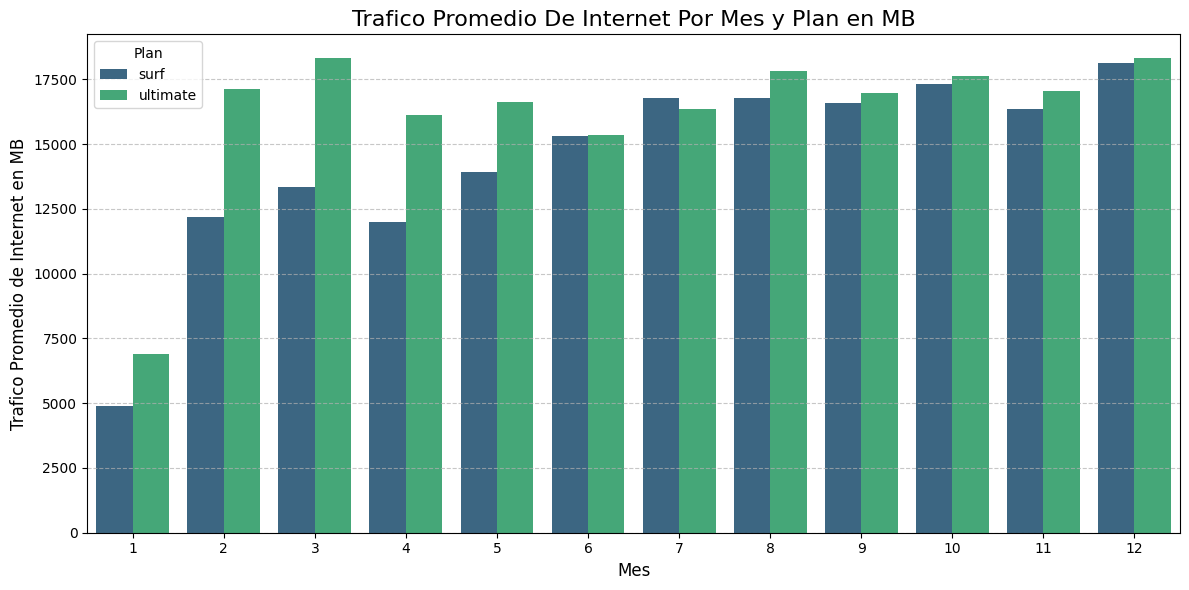


Plan surf:
Media de mensajes mensuales: 16558.28
Varianza de mensajes mensuales: 64216395.84

Plan Ultimate:
Media de mensajes mensuales: 17214.70
Varianza de mensajes mensuales: 61652293.32


In [ ]:
#Abordaremos el analisis de la misma manera que los otros dos anteriores para ver si en el consumo de internet hay variacion
#Y finalmente poder ver que puede motivar mas a los usuarios a tener un plan sobre otro

#Primero obtenemos el trafico  de cada usuario al mes por plan para el grafico
average_monthly_internet_mb = data_merged.groupby(['plan','month'])['monthly_mb'].mean().reset_index()

#Despues de haberlo verificado trazamos el grafico de barras.
plt.figure(figsize=(12,6))
sns.barplot(data = average_monthly_internet_mb, x='month', y='monthly_mb', hue='plan', palette='viridis')

#Agregamos titulos y etiquetas.
plt.title('Trafico Promedio De Internet Por Mes y Plan en MB', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Trafico Promedio de Internet en MB', fontsize=12)
plt.xticks(rotation=0)#Para asegurnarnos que la etiquetas sean legibles
plt.legend(title='Plan')
plt.grid(axis='y',linestyle='--', alpha=0.7) #Agregamos siempre una cuadricula

#Ajustamos el diseño y mostramos
plt.tight_layout()
plt.show()

print()
#================================================================================================

#Ahora vamos a calcular y mostrar la media y varianza de ambos planes
#Separamos el consumo de cada plan por mes
surf_internet_mb = data_merged[data_merged['plan'] == 'surf']['monthly_mb']
ultimate_internet_mb = data_merged[data_merged['plan']== 'ultimate']['monthly_mb']

#Calculamos la varianza y media
#Plan Surf
mean_surf_internet_mb = surf_internet_mb.mean()
variance_surf_internet_mb = surf_internet_mb.var()
#Plan Ultimate
mean_ultimate_internet_mb = ultimate_internet_mb.mean()
variance_ultimate_internet_mb = ultimate_internet_mb.var()

#Mostramos los resultados e imprimimos los valores a 2 decimales.
print('Plan surf:')
print(f'Media de mensajes mensuales: {mean_surf_internet_mb:.2f}')
print(f'Varianza de mensajes mensuales: {variance_surf_internet_mb:.2f}')

print('\nPlan Ultimate:')
print(f'Media de mensajes mensuales: {mean_ultimate_internet_mb:.2f}')
print(f'Varianza de mensajes mensuales: {variance_ultimate_internet_mb:.2f}')


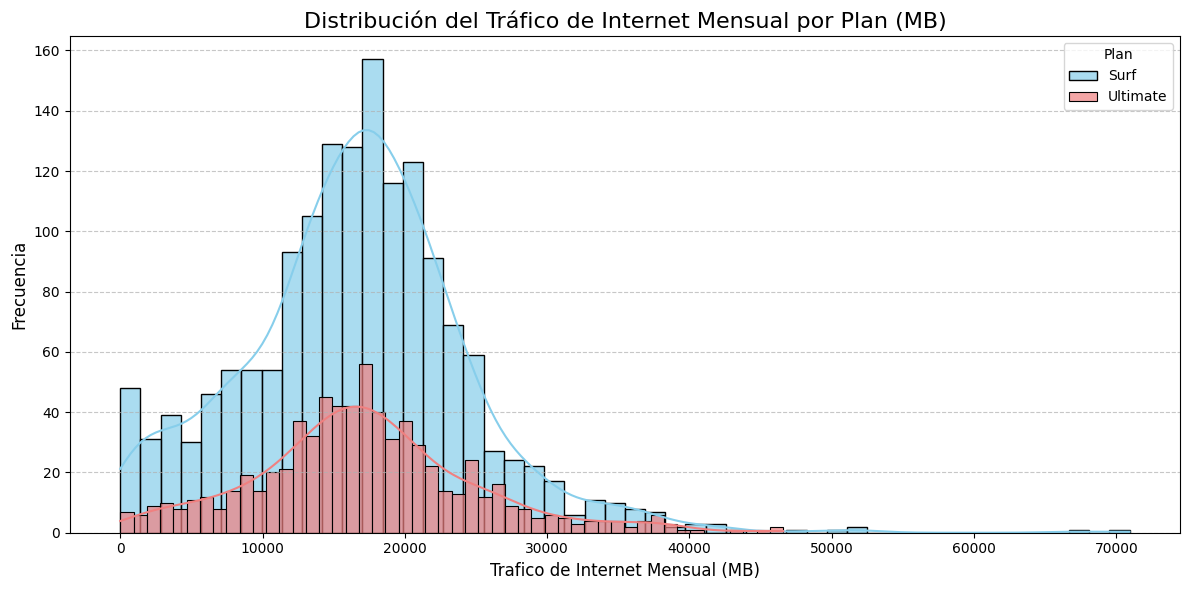

In [ ]:
#Ahora trazamos un histograma para visualizar la distribución del trafico de internet mensual por plan.
plt.figure(figsize=(12, 6))

#Creamos histogramas para cada plan
sns.histplot(surf_internet_mb, bins=50, color='skyblue', alpha=0.7, label='Surf', kde=True)
sns.histplot(ultimate_internet_mb, bins=50, color='lightcoral', alpha=0.7, label='Ultimate', kde=True)

# Añadimos los titulos y etiquetas
plt.title('Distribución del Tráfico de Internet Mensual por Plan (MB)', fontsize=16)
plt.xlabel('Trafico de Internet Mensual (MB)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='Plan')
plt.grid(axis='y', linestyle='--', alpha=0.7) #Agregamos una cuadrícula

# Ajustamos el diseño y mostramos
plt.tight_layout()
plt.show()


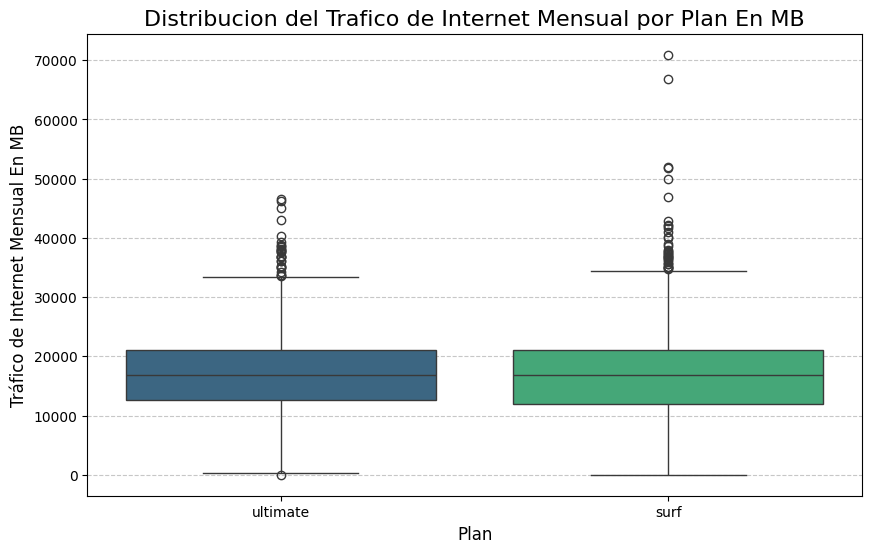

In [ ]:
#Trazamos un diagrama de caja para visualizar la distribución del tráfico de internet mensual por plan.
plt.figure(figsize=(10, 6))
sns.boxplot(x='plan', y='monthly_mb', data=data_merged, palette='viridis', hue='plan')

#Agregamos los títulos y etiquetas
plt.title('Distribucion del Trafico de Internet Mensual por Plan En MB', fontsize=16)
plt.xlabel('Plan', fontsize=12)
plt.ylabel('Tráfico de Internet Mensual En MB', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) #Agregamos siempre una cuadrícula

# Mostramos el gráfico
plt.show()

Podemos verque las medias son similares para ambos planes. Las varianzas son elevadas pero aun asi son igualmente comparables y similares ambas, eso indica que hay gran dispersion en el consumo de datos en ambos planes.
Sin embargo podria decirse que el consumo de datos no varia significativamente en funcion del plan; muy similar a lo que encontramos en el analisis de llamadas.

El análisis de estos 3 aspectos sugiere que la principal diferencia en el comportamiento del usuario entre los planes Surf y Ultimate estaria en el uso de mensajes. Los usuarios de Ultimate parecen aprovechar su mayor
provision de mas mensajes para enviar un volumen significativamente mayor en comparación con los usuarios de Surf.

## Ingreso

Abordaremos los ingresos de la misma manera anterior



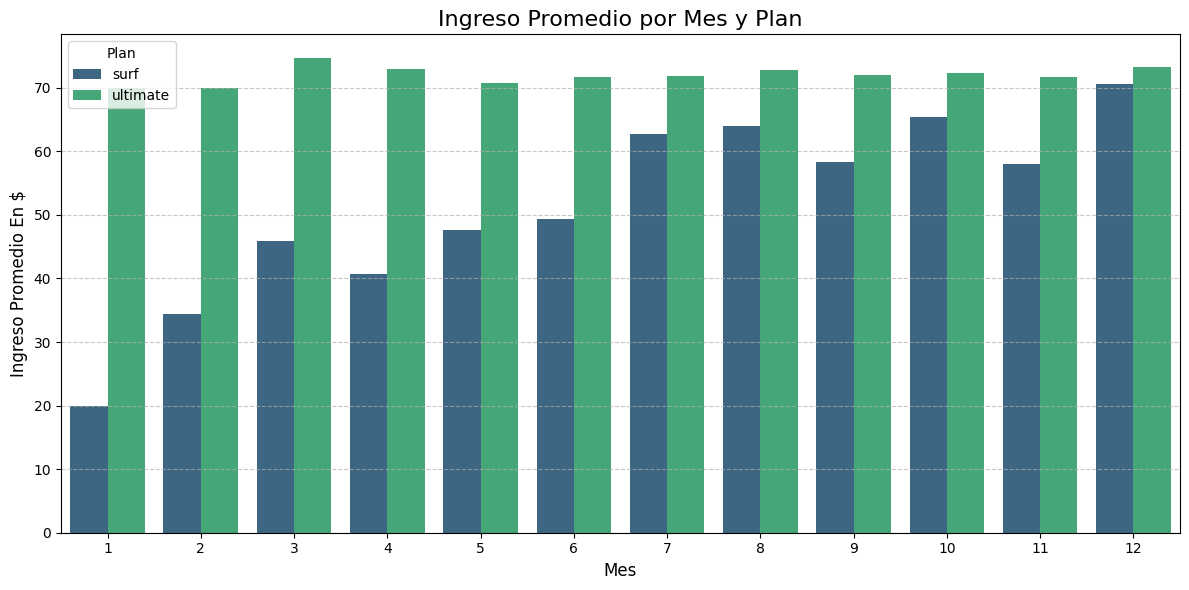


Plan Surf:
  Media de ingreso mensual: $60.71
  Varianza de ingreso mensual: $3067.84
  Desviación estándar de ingreso mensual: $55.39


Plan Ultimate:
  Media de ingreso mensual: $72.31
  Varianza de ingreso mensual: $129.85
  Desviación estándar de ingreso mensual: $11.40


In [ ]:
#Calculamos el ingreso promedio por plan y mes.
average_monthly_income = data_merged.groupby(['plan', 'month'])['monthly_income'].mean().reset_index()


#Trazamos un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=average_monthly_income, x='month', y='monthly_income', hue='plan', palette='viridis')

#Agregamos títulos y etiquetas
plt.title('Ingreso Promedio por Mes y Plan', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ingreso Promedio En $', fontsize=12)
plt.xticks(rotation=0) # Aseguramos que las etiquetas del mes sean legibles
plt.legend(title='Plan')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añadimos una cuadrícula suave en el eje Y

#Ajustamos el diseño y mostramos
plt.tight_layout()
plt.show()

print()

#==============================================================================================
# Separamos los datos del ingreso mensual por plan
surf_income = data_merged[data_merged['plan'] == 'surf']['monthly_income']
ultimate_income = data_merged[data_merged['plan'] == 'ultimate']['monthly_income']

#Calculamos tambien la media y la varianza del ingreso mensual para cada plan.
#Surf
mean_surf_income = surf_income.mean()
variance_surf_income = surf_income.var()

#Ultimate
variance_ultimate_income = ultimate_income.var()
mean_ultimate_income = ultimate_income.mean()


#En esta ocasion incluiremos la Desviación estándar
std_surf_income = surf_income.std()
std_ultimate_income = ultimate_income.std()


#Mostramos los resultados
print(f"Plan Surf:")
print(f"  Media de ingreso mensual: ${mean_surf_income:.2f}")
print(f"  Varianza de ingreso mensual: ${variance_surf_income:.2f}")
print(f"  Desviación estándar de ingreso mensual: ${std_surf_income:.2f}")
print("\n")
print(f"Plan Ultimate:")
print(f"  Media de ingreso mensual: ${mean_ultimate_income:.2f}")
print(f"  Varianza de ingreso mensual: ${variance_ultimate_income:.2f}")
print(f"  Desviación estándar de ingreso mensual: ${std_ultimate_income:.2f}")



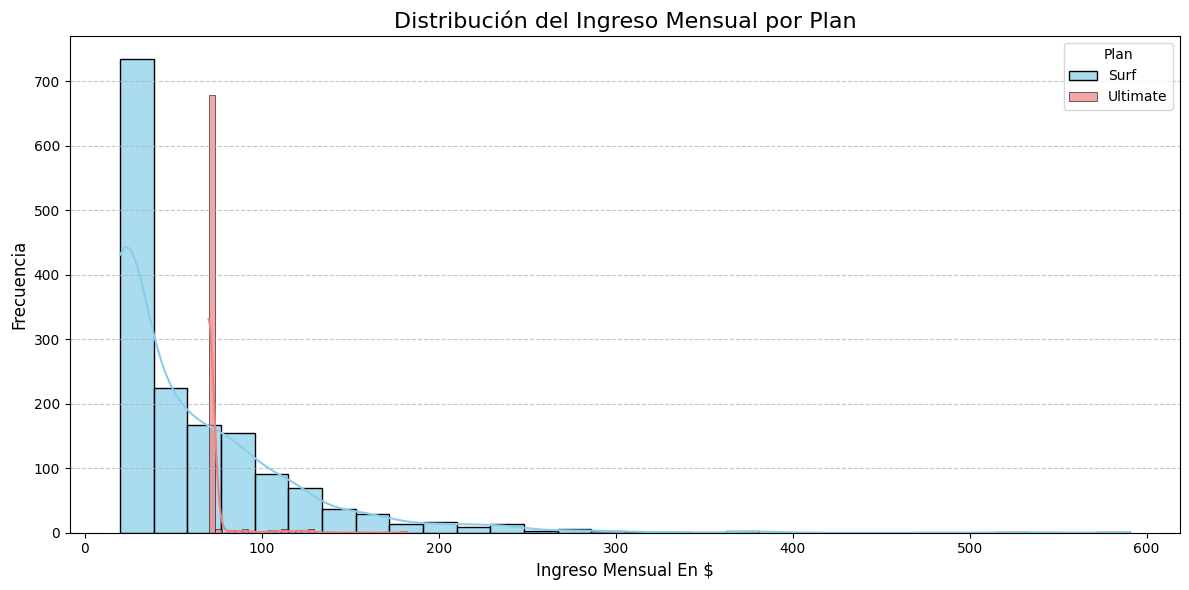

In [ ]:
#Trazamos un histograma para visualizar la distribución del ingreso mensual por plan.
plt.figure(figsize=(12, 6))

#Creamos un histograma para cada plan
sns.histplot(surf_income, bins=30, color='skyblue', alpha=0.7, label='Surf', kde=True)
sns.histplot(ultimate_income, bins=30, color='lightcoral', alpha=0.7, label='Ultimate', kde=True)

#Agregamos los títulos y etiquetas
plt.title('Distribución del Ingreso Mensual por Plan', fontsize=16)
plt.xlabel('Ingreso Mensual En $', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='Plan')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añadimos una cuadrícula suave

# Ajustamos el diseño y mostramos
plt.tight_layout()
plt.show()


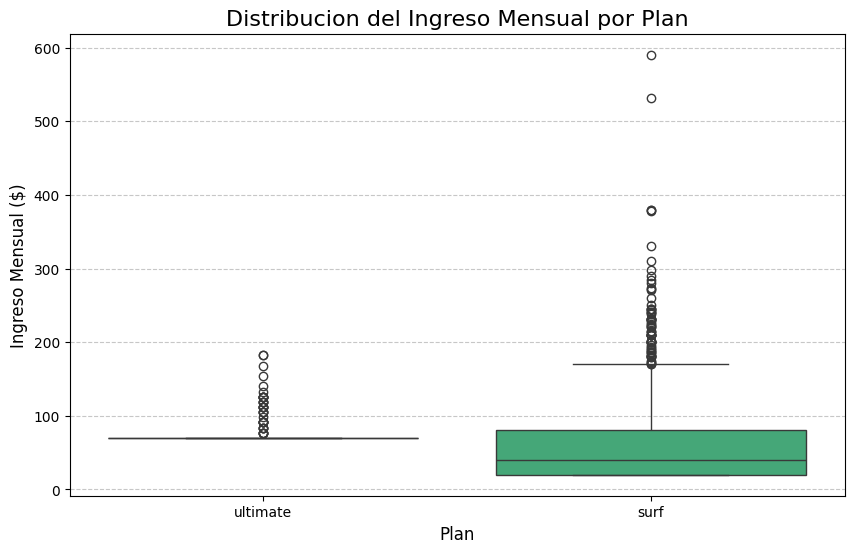

In [ ]:
#Trazamos un diagrama de caja para visualizar la distribución del ingreso mensual por plan.
plt.figure(figsize=(10, 6))

# Usamos siempre seaborn.boxplot
sns.boxplot(x='plan', y='monthly_income', data=data_merged, palette='viridis', hue='plan')

#Agregamos los títulos y etiquetas
plt.title('Distribucion del Ingreso Mensual por Plan', fontsize=16)
plt.xlabel('Plan', fontsize=12)
plt.ylabel('Ingreso Mensual ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añadimos una cuadrícula suave

# Mostramos el gráfico
plt.show()

Segun lo que podemos ver en los tres graficos; el plan Ultimate genera un ingreso promedio mas alto que el plan surf, sin embargo de una manera distinta.
El plan ultimate es en escencia mas predecible y estable, lo que da cierta seguridad a la empresa, podria decirse que los usuarios pueden estar mas satisfechos porque solo pagan la tarifa base.

Surf en cambio es mas variable, y una parte importante de los ingresos que produce es por cargos adicionales.

Para la empresa al final, esto indica que Ultimate es el que mas ingreso confiable genera, haciendolo el mas rentable para Megaline lo que lo  pero Surf tiene su potencial probablemente con los usuarios de alto consumo, por el asunto de los sobrecargos.

## Prueba las hipótesis estadísticas

Probaremos la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.

Hipotesis Nula:
Los ingresos promedio de los usuarios de los planes Ultimate y Surf no son difrentes.


Hipotesis alternativa:
Los ingresos promedio de los usuarios de los planes Ultimate y Surf son diferentes

In [ ]:
# Prueba las hipótesis
#Haremos una prueba de dos colas para verificarsi los promedios son diferentes en cualquier direccion
#ultimate > surf o surf > ultimate
#Haremos una prueba t de Student para muestras independientes ya que ambos planes lo son
# nuestro alfa sera p = 0.05 nos iremos por el estandar estadistico

alpha = 0.05 #Definimos el nivel de significancia

#Como las varianzas son diferentes asumiremos que son desiguales equal_var=False
#Usaremos ttest_ind para esta prueba
#Pondre el codigo paso a paso para mejor comprension (Puede hacerse todo en una sola linea)
results = st.ttest_ind(surf_income, ultimate_income, equal_var=False) #Obtenemos el valor p

#Imprimimos ese valor p
print('El valor p resultante es: ', results.pvalue)

#Comparamos ese valor con el alfa que establecimos
if results.pvalue < alpha:
    print('\n Rechazamos la hipótesis nula')
else:
    print('\n No rechazamos la hipótesis nula')





El valor p resultante es:  3.1703905481135738e-15

 Rechazamos la hipótesis nula


Ahora vamos a evaluar a los usuarios de NY-NJ
Planteamos las siguientes hipotesis:

Hipotesis nula:
El ingreso promedio de los usuarios del area de NY-NJ no es diferente al de los de otras regiones.

Hipotesis alternativa:
El ingreso promedio de los uruarios del area de NY-NJ es diferente al de los usuarios de otras regiones.

In [ ]:
# Prueba las hipótesis

#Aqui tambien haremos una prueba de dos colas y una prueba t de student puede ser la mas apropiada.
#Nuestro valor alfa sera siempre p=0.05

#Primero tenemos que "segmentar" nuestro Dataframe principal para los sectores en cuestion
#La columna 'city' contiene el nombre de la ciudad
#.str.contains() nos sirve para buscar filas que contengan un string especifico.
nynj_users_income = data_merged[data_merged['city'].str.contains('NY-NJ')]['monthly_income']

#Identificamos los demas usuarios de otras regiones.
#Todos los que NO estan en NY-NJ lo definimos usando la negacion ~
other_region_users_income = data_merged[~data_merged['city'].str.contains('NY-NJ')]['monthly_income']

#Mostramos el número de usuarios en cada grupo para verificar
print(f"Número de usuarios en la región NY-NJ: {len(nynj_users_income)}")
print(f"Número de usuarios en otras regiones: {len(other_region_users_income)}")

#Realizamos la prueba usando los mismos parametros basicos de la prueba anterior
alpha = 0.05
results = st.ttest_ind(nynj_users_income, other_region_users_income, equal_var=False )
print('\n El valor p resultante es: ', results.pvalue)

#Comparamos el valor resultante con nuestro alpha
if results.pvalue < alpha:
    print('\n Rechazamos la hipótesis nula')
else:
    print('\n No rechazamos la hipótesis nula')



Número de usuarios en la región NY-NJ: 377
Número de usuarios en otras regiones: 1916

 El valor p resultante es:  0.0335256158853001

 Rechazamos la hipótesis nula


## Conclusión general

Basándonos en todo nuestro análisis; realizamos y concluimos lo siguiente:

Preparación de Datos:

Limpiamos y enriquecimos los datos de usuarios, llamadas, mensajes e internet, asegurandonos de tener formatos de fecha correctos, valores ausentes manejados (rellenados con 0 donde correspondía al no uso) y redondeando los minutos y MB según las reglas de facturación. Agregamos los datos a nivel de usuario por mes y calculamos correctamente el ingreso mensual por usuario considerando las tarifas base y los cargos adicionales.


Análisis de Comportamiento del Usuario por Servicio:

- Llamadas: El comportamiento de los usuarios en cuanto a la duración mensual de las llamadas es muy similar entre los planes Surf y Ultimate; las medias, varianzas y distribuciones son parecidas. El plan no parece ser un factor determinante en cuánto tiempo habla un usuario.

- Mensajes: El comportamiento de los usuarios en cuanto al número de mensajes enviados si difiere notablemente. Los usuarios de Ultimate envían más mensajes en promedio y su distribución de uso se inclina hacia volúmenes más altos que los de Surf. Esto parece estar relacionado con el mayor límite de mensajes incluidos en el plan Ultimate.
- Internet: El comportamiento de los usuarios en cuanto al tráfico de internet consumido es muy similar entre los planes Surf y Ultimate; las medias y distribuciones tambien son parecidas, aunque ambos planes muestran una alta variabilidad en el consumo de datos.


Análisis de Ingresos:
El análisis descriptivo y las visualizaciones mostraron que el ingreso promedio por usuario es mayor en el plan Ultimate que en el plan Surf.
Las distribuciones de ingresos son muy diferentes: el ingreso de Ultimate está altamente concentrado en su tarifa base ($70), indicando que la mayoría de los usuarios no incurren en sobrecargos significativos. El ingreso de Surf es más variable y significativamente influenciado por los cargos adicionales, con una distribución que se extiende a valores mucho más altos debido a usuarios que superan sus límites más bajos. La variabilidad del ingreso por usuario es mucho mayor en Surf.


Pruebas de Hipótesis Estadísticas:

La prueba t para muestras independientes confirmó estadísticamente que la diferencia en el ingreso promedio entre los planes Ultimate y Surf es significativa. Esto respalda la conclusión de que Ultimate es más rentable por usuario en promedio.
La prueba t para muestras independientes también confirmó que la diferencia en el ingreso promedio entre los usuarios de la región NY-NJ y los de otras regiones es significativa. Esto indica una diferencia de ingresos relevante geográficamente.

Finalmente...

Conclusiones Significativas para el Negocio (Megaline):

El Plan Ultimate es, en promedio y estadísticamente, más rentable por usuario que el Plan Surf. Aunque el Plan Surf genera ingresos adicionales por sobrecargos, el ingreso promedio y la estabilidad del ingreso por usuario son superiores en el Plan Ultimate.
La principal diferencia en el comportamiento del usuario que parece estar relacionada con las diferencias entre planes es el uso de mensajes, donde los usuarios de Ultimate utilizan significativamente más que los de Surf, probablemente aprovechando su mayor franquicia. El consumo de llamadas e internet es similar entre planes.
Existe una diferencia estadísticamente significativa en el ingreso promedio generado por los usuarios en la región NY-NJ en comparación con otras regiones.


Recomendaciones para el Departamento Comercial:

Enfoque Publicitario Principal:

- Dado que el Plan Ultimate genera un ingreso promedio más alto por usuario y sus ingresos son más estables, Megaline debería considerar dirigir una mayor parte de su presupuesto de publicidad a atraer y retener clientes para el Plan Ultimate.
- Potencial de Surf: Aunque Surf tiene un promedio de ingresos menor, los sobrecargos representan una fuente importante de ingresos para este plan. Se podria quizás incentivar el uso o promocionar el cambio a Ultimate para los usuarios de alto consumo en Surf podría ser una estrategia complementaria.
- Estrategia Regional (NY-NJ): La diferencia de ingresos en la región NY-NJ justifica un análisis más profundo. Megaline debería investigar qué impulsa esta diferencia si patrones de uso, demografía, competencia local etc. y considerar desarrollar estrategias de marketing o planes específicos para el mercado de NY-NJ.


Decisiones y/o Suposiciones Importantes Tomadas:

Los valores ausentes en las columnas de uso call_count, etc. se trataron como cero para el cálculo de ingresos.
Se redondearon los minutos de llamadas al siguiente entero y los MB de internet consumidos por encima del límite del plan al siguiente GB para el cálculo de sobrecargos, según las reglas de la empresa.
Se utilizó un nivel de significancia (alpha) de 0.05 para las pruebas de hipótesis.
Se asumieron varianzas desiguales para las pruebas t de Student debido a las diferencias observadas en las varianzas de los datos de ingresos.